**Import Libraries**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline 

**Load Data**

In [2]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [3]:
train_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [4]:
train_df.dropna(inplace=True)

#### Correlations between Features

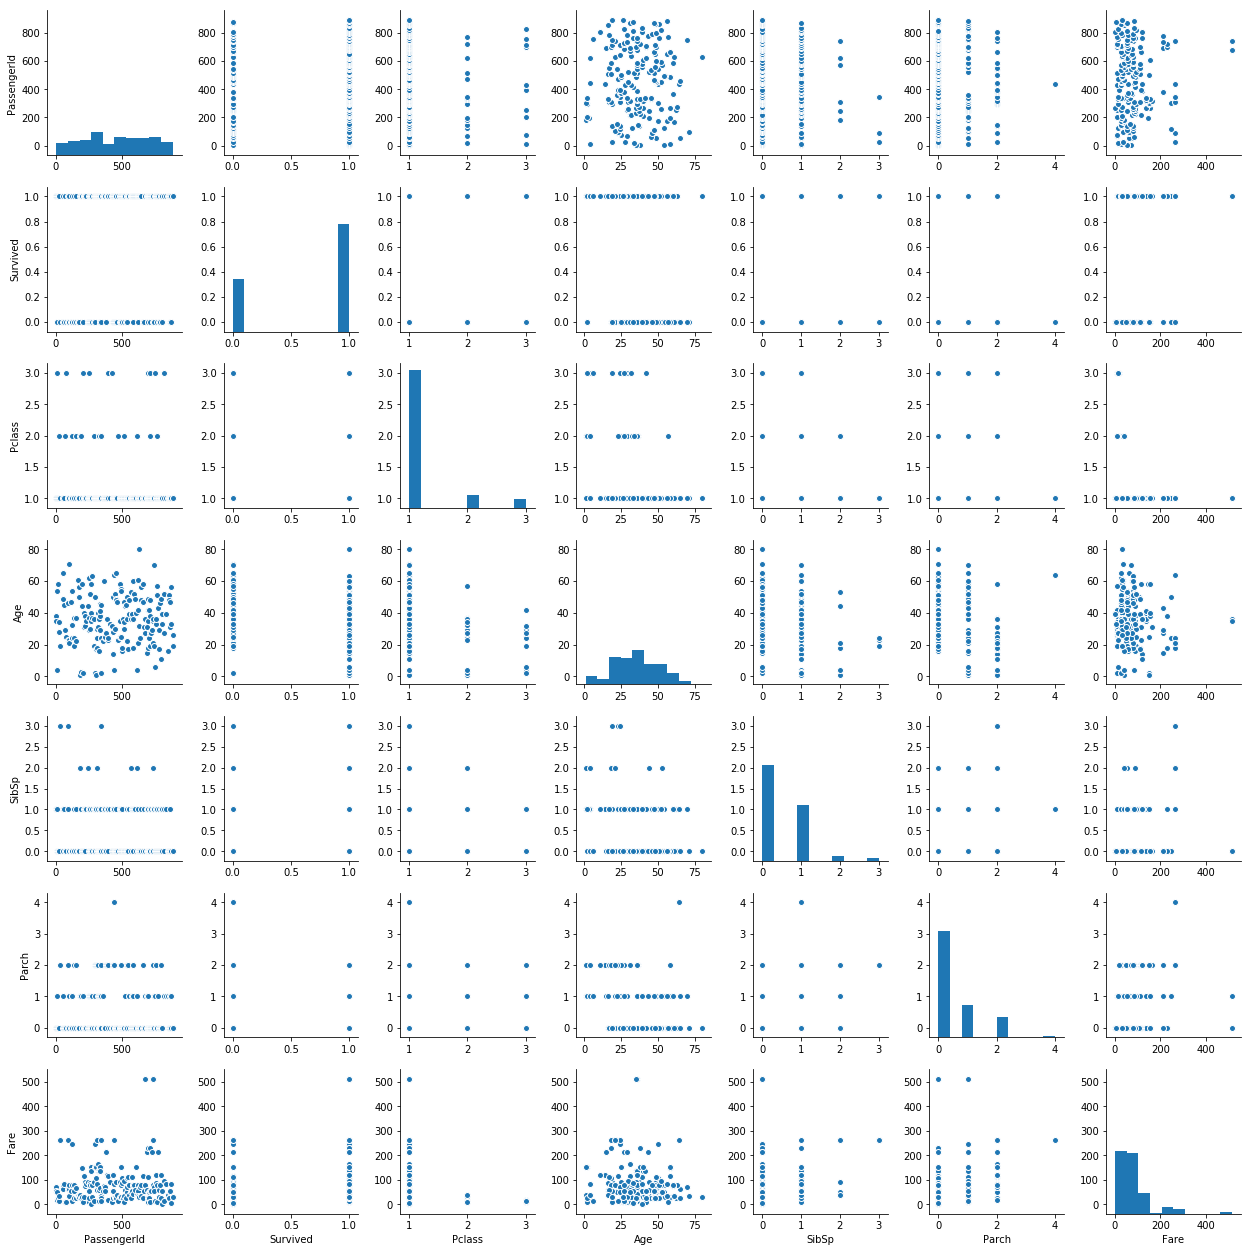

In [5]:
sns.pairplot(train_df)

**Survival By Gender**

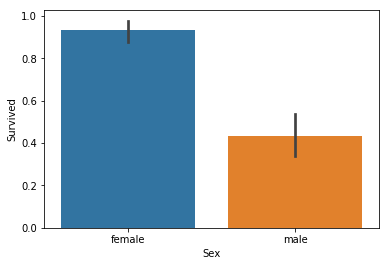

In [6]:
sns.barplot('Sex','Survived',data=train_df)

**Survival By Boarding Class**

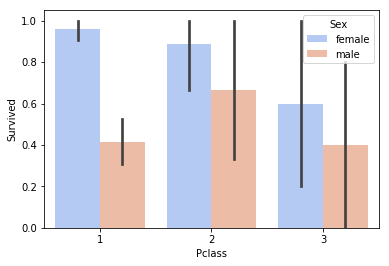

In [7]:
sns.barplot(x='Pclass', y='Survived', hue='Sex', data=train_df, palette='coolwarm')

**Total count per class based on Gender**

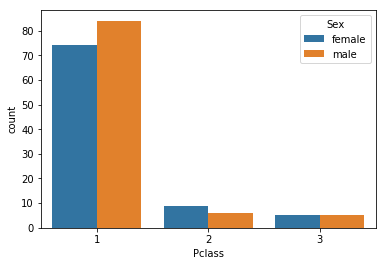

In [8]:
sns.countplot('Pclass',hue='Sex',data=train_df)

#### Plotting based on Embarkment town

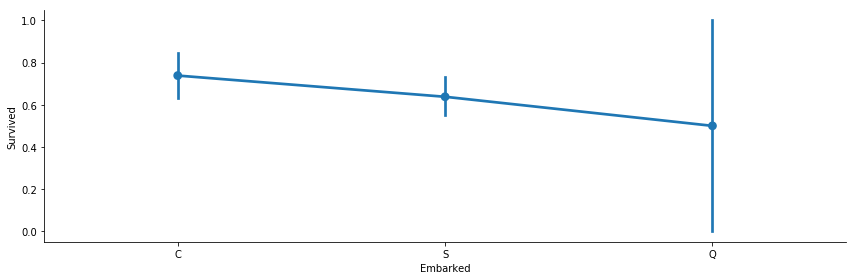

In [22]:
# plot
figsize=(15,5)
sns.factorplot('Embarked','Survived', data=train_df,size=4,aspect=3)

### Age Distribution

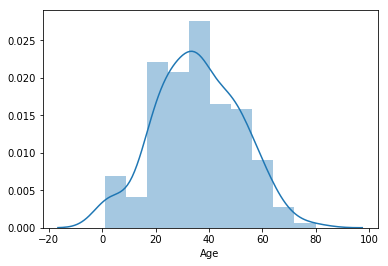

In [10]:
figsize=(15,5)
sns.distplot(train_df['Age'])

#### Heatmap for correlation between Features

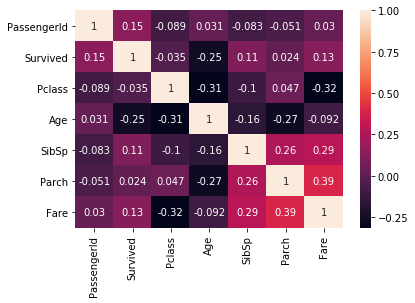

In [11]:
sns.heatmap(train_df.corr(),annot=True)

#### Training Data Split

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X = train_df[['Pclass','Age','SibSp','Fare']]
y = train_df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

#### Model fitting and Evaluation

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report, confusion_matrix

In [15]:
lm = LinearRegression()

In [16]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [17]:
pred = lm.predict(X_test)

## Model Evaluation

**Evaluate the model by check the co-efficients**

In [18]:
print(lm.intercept_)

0.9111162413826148


#### Coefficient for the two features (Age, Pclass)

In [19]:
lm.coef_ 

array([ 0.09184595, -0.0092447 , -0.01263719,  0.00027677])

In [20]:
co_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
co_df

,Coefficient
Pclass,0.091846
Age,-0.009245
SibSp,-0.012637
Fare,0.000277


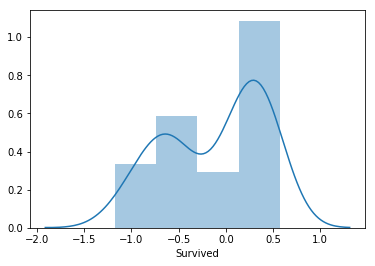

In [23]:
sns.distplot((y_test-pred))